## Relational Plots
Relational plots are used to describe the relationship between two variables. It is typical to plot the independent variable on the x-axis, and the dependant variable on the y-axis. There are two main types of relational plot:

* The scatter plot
* The line plot. Only use when the x-axis data is ordered and unique. Commonly used for time-series data.
 
### Scatter plots
Below is an example of a scatter plot that shows how temperature and pressure are related.

In [1]:
import pandas as pd
pollution_data = pd.read_csv('LSTM-Multivariate_pollution.csv', index_col = 'date', parse_dates = True, dayfirst = True)

<Axes: xlabel='press', ylabel='temp'>

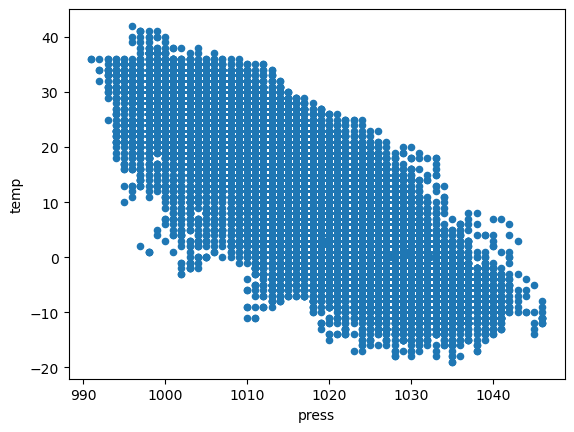

In [2]:
pollution_data.plot(x = 'press', y = 'temp', kind = 'scatter')

If a scatter plot reveals a linear relationship in the data, it can be useful to also evaluate a correlation coefficient. Correlation describes the strength of a linear relationship as a number between -1 and +1. 

* -1 means a perfect linear relationship with a negative slope
* 0 means no linear relationship
* +1 means a perfect linear relationship with a positive slope

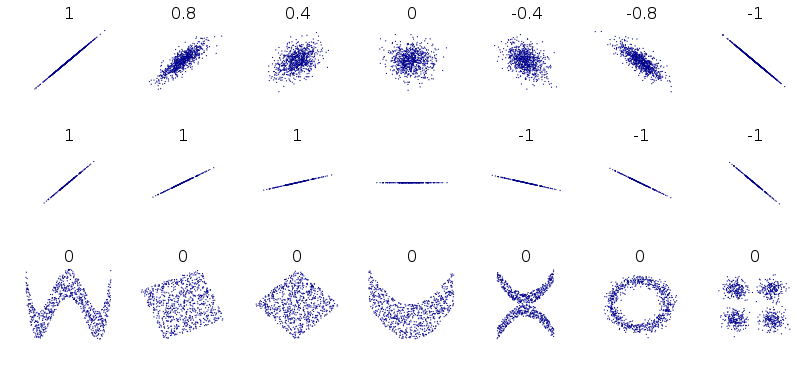

In pandas, this can be found with the <code>corr</code> method.

In [3]:
pollution_data[['press', 'temp']].corr()

,press,temp
press,1.000000,-0.827205
temp,-0.827205,1.000000


This revelas a correlation of -0.8272, which indicates a fairly strong negative linear relationship.

### Line plots
Below is an example of a line plot that shows how temperature varies by date. Note in the example below, no arguments are required. Index by default goes on the x-axis, there is just a single column selected so no need to select a y-axis, and the default plot is a line graph.

<Axes: xlabel='date'>

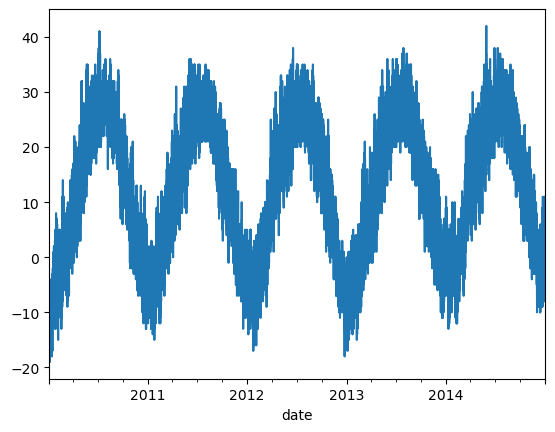

In [4]:
pollution_data['temp'].plot()

***
## Distribution Plots
Distribution plots show how a single variable in a dataset is distributed. The main distribution plots are:

* Histogram. This splits the variable into bins and then plots the frequency of each bin.
* Density plot. This is like a smoothed version of a histogram which approximates the probability density of the variable. The y-axis values are scaled so that the total area under the curve equals 1.
 

### Histograms
Below is an example of a histogram for pollution levels in the pollution dataset.

<Axes: ylabel='Frequency'>

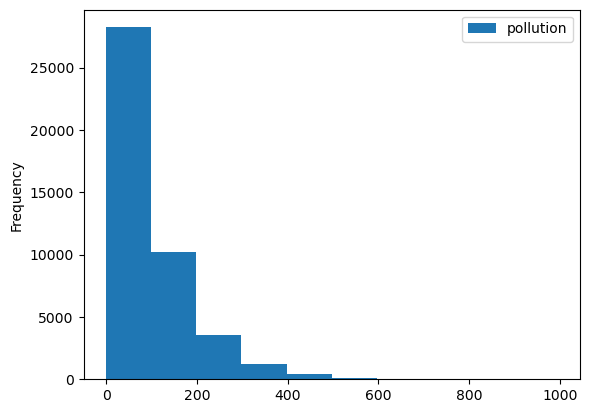

In [5]:
pollution_data.plot(y = 'pollution', kind = 'hist')

When creating a histogram, pandas will default to 10 bins (ie. 10 bars). You will want to tune this value with the <code>bins</code> argument to ensure that the histogram effectively captures the distribution of the variable. Too few bins (like above) results in a very coarse perspective of the distribution. To many bins results in many bins being empty. For this plot, a choice of 50 bins produces a much more informative results.

<Axes: ylabel='Frequency'>

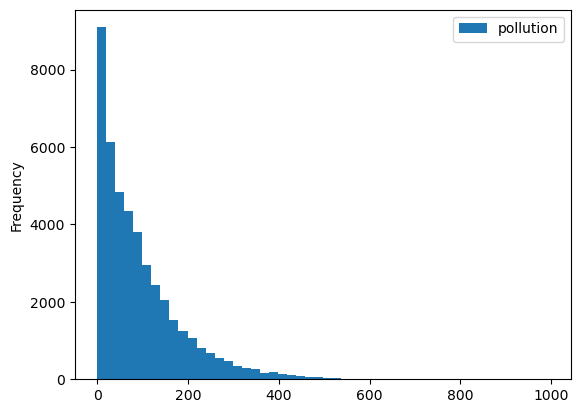

In [6]:
pollution_data.plot(y = 'pollution', kind = 'hist', bins = 50)

### Density plots
Below is an example of a density plot for pollution levels in the pollution dataset. Notice how it looks like a smooth version of the histogram. Also note that the y-axis is no longer frequency, but instead a probability density.

<Axes: ylabel='Density'>

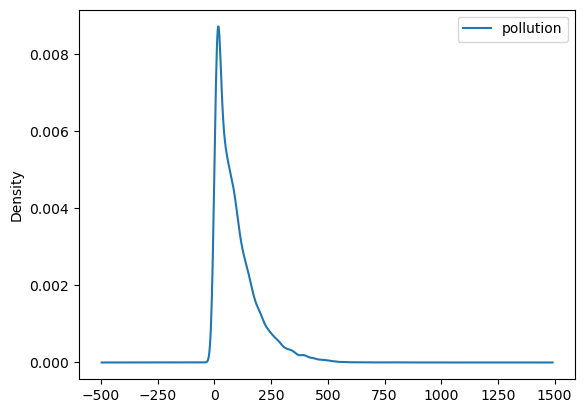

In [7]:
pollution_data.plot(y = 'pollution', kind = 'kde')

***
## Categorical Plots
Categorical plots are used when one of the variables is categorical. The main kinds of categorical plot are:

* Box plot. Key summary statistics (median, quadrants, outliers) displayed for each category. Use for non-aggregated data.
* Bar plot. Each category is represented with a bar. Useful for aggregated data.
* Pie plot. Similar to a bar plot, but plots each value as a percentage of the whole.
 

### Box plots
Below is an example of visualising temperature distributions for each wind direction. Note that you can use the by argument to specify what column to group the values by.

temp    Axes(0.125,0.11;0.775x0.77)
dtype: object

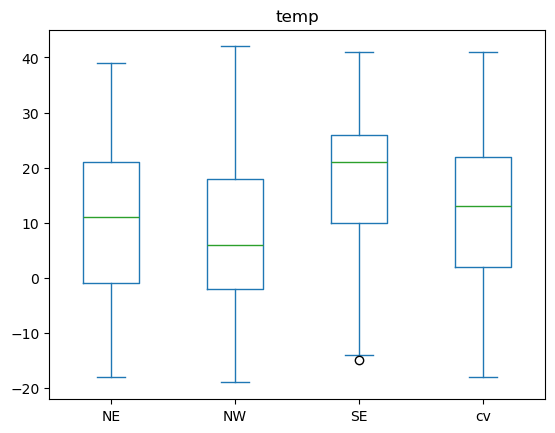

In [8]:
pollution_data[['temp', 'wnd_dir']].plot(kind = 'box', by = 'wnd_dir')

### Bar plot
Below is an example of a bar plot that shows the average pollution level for each wind direction. Note for a bar plot, you need to perform data aggregation before plotting, since it plots just a single value for each category.

<Axes: xlabel='wnd_dir'>

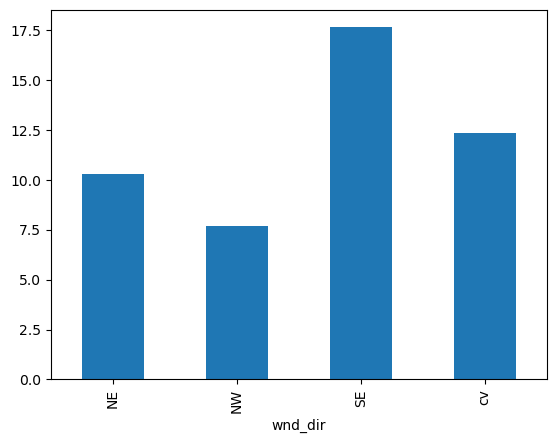

In [9]:
avg_temps = pollution_data.groupby('wnd_dir')['temp'].mean()
avg_temps.plot(kind = 'bar')

### Pie plot
Below is an example of how frequently different wind directions occur in the pollution dataframe. Note that we have to aggregate for each group before plotting, since there is just a single wedge for each category. The <code>autopct</code> argument is used to display the percentage for each category.

<Axes: ylabel='count'>

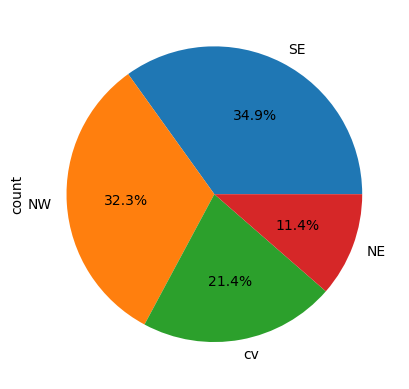

In [10]:
wnd_dir_counts = pollution_data['wnd_dir'].value_counts()
wnd_dir_counts.plot(kind = 'pie', autopct='%1.1f%%')